<a href="https://colab.research.google.com/github/kirath2205/Final-Year-Project/blob/Test_bench/Test_bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras,os
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D , Dropout
import numpy as np
from tensorflow import keras
from keras.initializers import glorot_uniform
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from keras import regularizers


In [2]:
!pip install Keras-applications


In [3]:
def select_dataset(index):

  if(index==1):
    fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
    (X_train, y_train), (X_test, y_test) = fashion_mnist

  elif(index==2):
    cifar_10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar_10
  
  elif(index==3):
    cifar_100 = tf.keras.datasets.cifar100.load_data()
    (X_train, y_train), (X_test, y_test) = cifar_100
    print(len(X_train))

    
  return X_train,y_train,X_test,y_test

In [4]:
def pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,image_channel):
  img_width = X_train.shape[1]
  img_height = X_train.shape[2]
  input_shape = (img_width, img_height, image_channel)
  
  # normalize data
  X_train, X_test = X_train / 255, X_test / 255

  # reshape input 
  X_train = X_train.reshape(X_train.shape[0], *input_shape)
  X_test = X_test.reshape(X_test.shape[0], *input_shape)

  # one-hot
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)

  return X_train,y_train,X_test,y_test,input_shape

def pre_processing_cifar10(X_train,y_train,X_test,y_test,image_channel):
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  y_train = keras.utils.to_categorical(y_train)
  y_test = keras.utils.to_categorical(y_test)

  X_train = preprocess_input(X_train)
  X_test = preprocess_input(X_test)

  img_width = X_train[0].shape[0]
  img_height = X_train[0].shape[1]
  image_channel = image_channel

  input_shape=(img_width,img_height,image_channel) 
  print(input_shape)
  return X_train,y_train,X_test,y_test,input_shape
  
def pre_processing_cifar100(X_train,y_train,X_test,y_test,image_channel):
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train = preprocess_input(X_train)
  X_test = preprocess_input(X_test)

  y_train = keras.utils.to_categorical(y_train)
  y_test = keras.utils.to_categorical(y_test)

  img_width = X_train[0].shape[0]
  img_height = X_train[0].shape[1]
  image_channel = image_channel

  input_shape=(img_width,img_height,image_channel) 
  print(input_shape)
  return X_train,y_train,X_test,y_test,input_shape

In [5]:
def define_model_vgg16(image_shape,total_classes):

  model = Sequential()
  weight_decay = 0.0005
  learning_rate = 0.1
  lr_decay = 1e-6
  lr_drop = 20
  model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=image_shape,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  
  return model

def define_model_standard_cnn(image_shape,total_classes):
  initializer = tf.keras.initializers.HeUniform()
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation = 'relu',  padding = 'same', input_shape = image_shape))
  model.add(Conv2D(32,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))  
  model.add(Conv2D(64,(3,3), activation = 'relu',  padding = 'same'))
  model.add(Conv2D(64,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128,(3,3), activation = 'relu',  padding = 'same'))
  model.add(Conv2D(128,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(total_classes, activation = 'softmax'))
  opt = keras.optimizers.SGD(learning_rate=0.001 , momentum=0.9)
  model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
  return model



In [6]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape, classes):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model_vgg16(X_train,y_train,X_test,y_test,epochs=10,batch_size=128):
  
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_vgg16', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 10)
  ]
  history=model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,callbacks = callbacks, verbose = 1,validation_data=(X_test,y_test))
  return history

def train_model_standard_cnn(X_train,y_train,X_test,y_test,epochs=10,batch_size=64):
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_standard_cnn', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 10)
  ]
  history=model.fit(X_train , y_train , epochs = epochs , validation_data=(X_test,y_test),batch_size=batch_size , callbacks = callbacks)
  return history


def train_model_resnet34(X_train,y_train,X_test,y_test,epochs=10):
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_resnet50', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 10)
  ]
  history=model.fit(X_train , y_train , epochs = epochs , validation_data=(X_test,y_test),batch_size= 64 , callbacks = callbacks)
  return history

In [8]:
def make_prediction(model,X_test,index):

  return model.predict(X_test(index))


In [9]:

'''X_train,y_train,X_test,y_test=select_dataset(1)
X_train,y_train,X_test,y_test,image_shape=pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,1)
model=define_model(image_shape,10)
train_model(X_train,y_train,X_test,y_test)'''

X_train,y_train,X_test,y_test=select_dataset(2)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar10(X_train,y_train,X_test,y_test,3)
model=define_model_standard_cnn(image_shape,10)
history_cnn_model = train_model_standard_cnn(X_train,y_train,X_test,y_test,epochs=100)
model.save('/content/checkpoint/cnn_model.h5')

X_train,y_train,X_test,y_test=select_dataset(2)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar10(X_train,y_train,X_test,y_test,3)
model=ResNet34(image_shape,10)
history_resnet=train_model_resnet34(X_train,y_train,X_test,y_test,epochs=100)
model.save('/content/checkpoint/resnet.h5')

X_train,y_train,X_test,y_test=select_dataset(2)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar10(X_train,y_train,X_test,y_test,3)
model=define_model_vgg16(image_shape,10)
history_vgg16=train_model_vgg16(X_train,y_train,X_test,y_test,epochs=100)
model.save('/content/checkpoint/vgg16.h5')

'''X_train,y_train,X_test,y_test=select_dataset(3)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar100(X_train,y_train,X_test,y_test,3)
model=ResNet34(image_shape,100)
history=train_model_resnet34(X_train,y_train,X_test,y_test,epochs=100)'''

(32, 32, 3)
Epoch 1/100
782/782 [==============================] - 19s 22ms/step - loss: 1.8868 - accuracy: 0.3138 - val_loss: 1.4777 - val_accuracy: 0.4637

Epoch 00001: val_accuracy improved from -inf to 0.46370, saving model to best_model_standard_cnn
INFO:tensorflow:Assets written to: best_model_standard_cnn/assets
Epoch 2/100
782/782 [==============================] - 16s 21ms/step - loss: 1.4190 - accuracy: 0.4887 - val_loss: 1.2534 - val_accuracy: 0.5491

Epoch 00002: val_accuracy improved from 0.46370 to 0.54910, saving model to best_model_standard_cnn
INFO:tensorflow:Assets written to: best_model_standard_cnn/assets
Epoch 3/100
782/782 [==============================] - 17s 21ms/step - loss: 1.2521 - accuracy: 0.5524 - val_loss: 1.1627 - val_accuracy: 0.5883

Epoch 00003: val_accuracy improved from 0.54910 to 0.58830, saving model to best_model_standard_cnn
INFO:tensorflow:Assets written to: best_model_standard_cnn/assets
Epoch 4/100
782/782 [==============================] - 

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
782/782 [==============================] - 97s 124ms/step - loss: 1.1100 - accuracy: 0.6079 - val_loss: 1.1638 - val_accuracy: 0.6132

Epoch 00002: val_accuracy improved from 0.54570 to 0.61320, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/100
782/782 [==============================] - 97s 125ms/step - loss: 0.9043 - accuracy: 0.6864 - val_loss: 1.1199 - val_accuracy: 0.6398

Epoch 00003: val_accuracy improved from 0.61320 to 0.63980, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/100
782/782 [==============================] - 96s 123ms/step - loss: 0.7593 - accuracy: 0.7363 - val_loss: 0.9071 - val_accuracy: 0.6995

Epoch 00004: val_accuracy improved from 0.63980 to 0.69950, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/100
782/782 [==============================] - 96s 123ms/step - loss: 0.6481 - accuracy: 0.7765 - val_loss: 0.8354 - val_accuracy: 0.7245

Epoch 00005: val_accuracy improved from 0.69950 to 0.72450, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/100
782/782 [==============================] - 96s 123ms/step - loss: 0.5551 - accuracy: 0.8085 - val_loss: 0.7720 - val_accuracy: 0.7506

Epoch 00006: val_accuracy improved from 0.72450 to 0.75060, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/100
782/782 [==============================] - 96s 123ms/step - loss: 0.4492 - accuracy: 0.8453 - val_loss: 0.8933 - val_accuracy: 0.7212

Epoch 00007: val_accuracy did not improve from 0.75060
Epoch 8/100
782/782 [==============================] - 97s 124ms/step - loss: 0.3664 - accuracy: 0.8735 - val_loss: 0.8201 - val_accuracy: 0.7547

Epoch 00008: val_accuracy improved from 0.75060 to 0.75470, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/100
782/782 [==============================] - 96s 123ms/step - loss: 0.2924 - accuracy: 0.9010 - val_loss: 0.8319 - val_accuracy: 0.7580

Epoch 00009: val_accuracy improved from 0.75470 to 0.75800, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 10/100
782/782 [==============================] - 96s 123ms/step - loss: 0.1012 - accuracy: 0.9671 - val_loss: 0.8533 - val_accuracy: 0.7979

Epoch 00010: val_accuracy improved from 0.75800 to 0.79790, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 11/100
782/782 [==============================] - 97s 124ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.9895 - val_accuracy: 0.7954

Epoch 00011: val_accuracy did not improve from 0.79790
Epoch 12/100
782/782 [==============================] - 97s 123ms/step - loss: 0.0261 - accuracy: 0.9930 - val_loss: 1.1281 - val_accuracy: 0.7915

Epoch 00012: val_accuracy did not improve from 0.79790

Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 13/100
782/782 [==============================] - 97s 124ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 1.1425 - val_accuracy: 0.7943

Epoch 00013: val_accuracy did not improve from 0.79790
Epoch 14/100
782/782 [==============================] - 96s 123ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 1.1808 - val_accuracy: 0.7950

Epoch 00014: val_accuracy did not improve from 0.79790
Epoch 15/100
782/782 [==============================] - 96s 123ms/step - loss: 0.0092 - accuracy: 0.9979 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
391/391 [==============================] - 68s 160ms/step - loss: 20.7064 - accuracy: 0.1840 - val_loss: 17.0667 - val_accuracy: 0.1132

Epoch 00001: val_accuracy improved from -inf to 0.11320, saving model to best_model_vgg16
INFO:tensorflow:Assets written to: best_model_vgg16/assets
Epoch 2/100
391/391 [==============================] - 60s 154ms/step - loss: 10.6648 - accuracy: 0.2921 - val_loss: 9.2152 - val_accuracy: 0.1284

Epoch 00002: val_accuracy improved from 0.11320 to 0.12840, saving model to best_model_vgg16
INFO:tensorflow:Assets written to: best_model_vgg16/assets
Epoch 3/100
391/391 [==============================] - 60s 154ms/step - loss: 5.7675 - accuracy: 0.3872 - val_loss: 5.4502 - val_accuracy: 0.2040

Epoch 00003: val_accuracy improved from 0.12840 to 0.20400, saving model to best_model_vgg16
INFO:tensorflow:Assets written to: best_model_vgg16/assets
Epoch 4/100
391/391 [==============================] - 60s 154ms/step - loss: 3.4350 - accuracy: 0.5036

'X_train,y_train,X_test,y_test=select_dataset(3)\nX_train,y_train,X_test,y_test,image_shape=pre_processing_cifar100(X_train,y_train,X_test,y_test,3)\nmodel=ResNet34(image_shape,100)\nhistory=train_model_resnet34(X_train,y_train,X_test,y_test,epochs=100)'

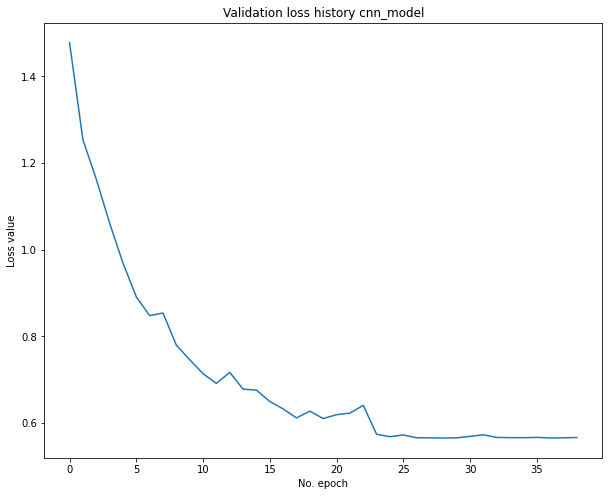

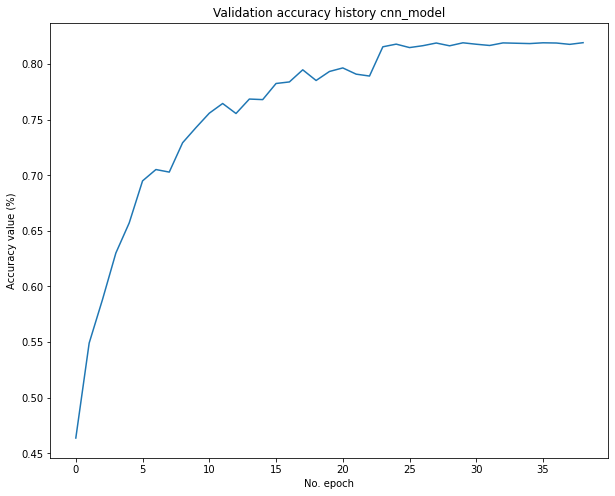

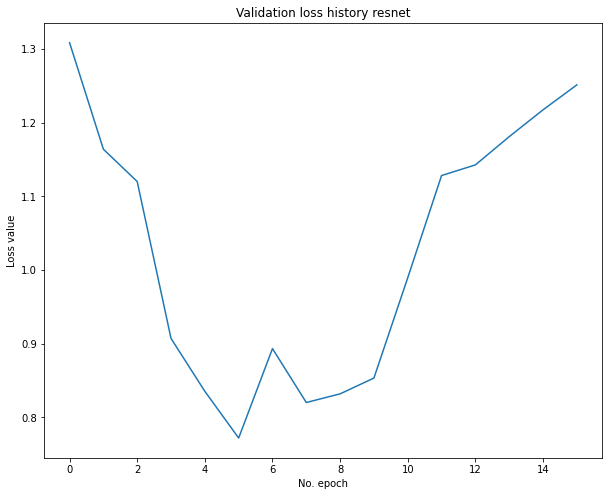

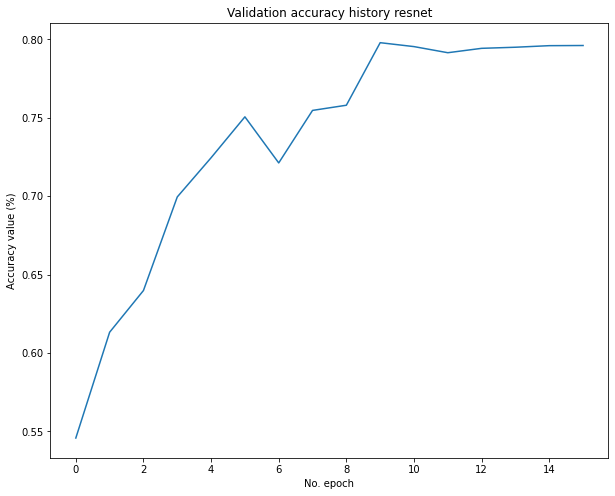

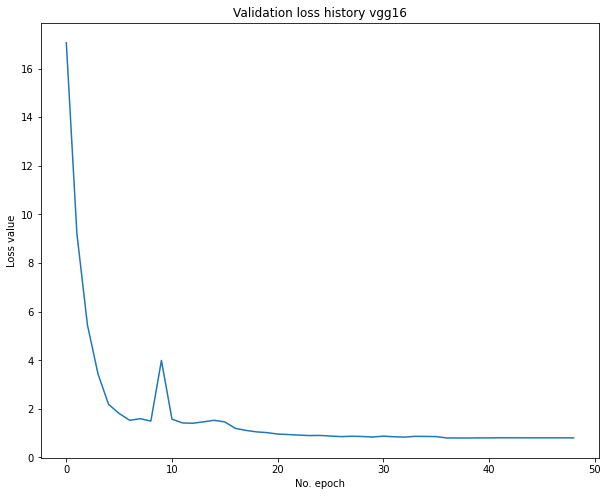

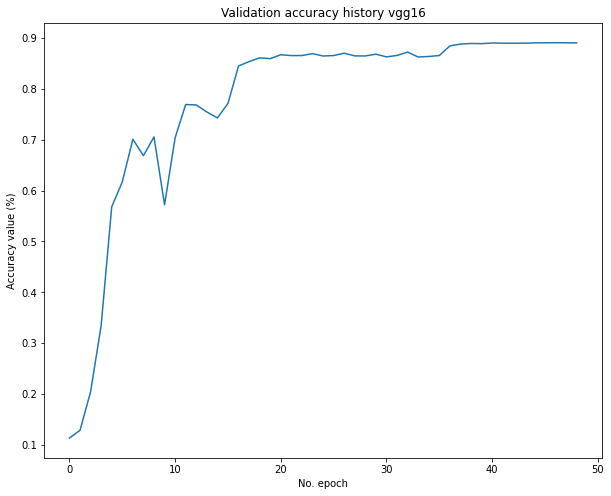

In [10]:
import matplotlib.pyplot as plt



# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model.history['val_loss'])
plt.title('Validation loss history cnn_model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model.history['val_accuracy'])
plt.title('Validation accuracy history cnn_model')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

print()
# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_resnet.history['val_loss'])
plt.title('Validation loss history resnet')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Validation accuracy history resnet')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_vgg16.history['val_loss'])
plt.title('Validation loss history vgg16')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()
print()
# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Validation accuracy history vgg16')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip freeze > requirements.txt

In [12]:

# Install bleeding edge version of cleverhans
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-j9vv3uhz/cleverhans_1861071d43d4478dab2b1b620a769c59
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-j9vv3uhz/cleverhans_1861071d43d4478dab2b1b620a769c59
     |████████████████████████████████| 154 kB 5.3 MB/s 
     |████████████████████████████████| 42 kB 809 kB/s 
  Created wheel for cleverhans: filename=cleverhans-4.0.0-py3-none-any.whl size=92423 sha256=431be2279359822e2a93bc666f99dd4dd602654072686b870874bd6086d87320
  Stored in directory: /tmp/pip-ephem-wheel-cache-7hppu49c/wheels/60/54/1e/97e3fe32d62bd252c9fbbee44a0545028c6018b81c054af3e4
Successfully built cleverhans


In [16]:

cnn_model = keras.models.load_model('/content/checkpoint/cnn_model.h5')

In [17]:

from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


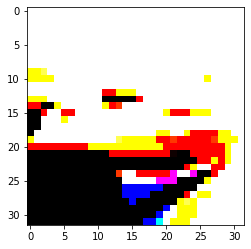

In [40]:
from keras.preprocessing.image import img_to_array
image_index = 1
image  = X_test[image_index]
image = img_to_array(image)
image = image.reshape(1, 32, 32, 3)
plt.imshow(image.reshape((32, 32 , 3)))

In [41]:
def make_predictions(model , label_array , image , image_index=1):
  prediction  = model.predict(image)[0]
  max_probability = float('-inf')
  index = -1
  true_label = -1
  for i in range(len(prediction)):
    if(prediction[i]>max_probability):
      max_probability = prediction[i]
      index = i
    if(y_test[image_index][i]==1):
      true_label = i
  print(prediction)
  print('prediction ',label_array[index],' probability ',max_probability)
  print('true value ',label_array[true_label])


labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [42]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

In [43]:
make_predictions(cnn_model , labels , image , image_index)

[3.5550253e-04 7.9878293e-02 8.5548404e-09 1.8491403e-07 5.1323727e-09
 2.2996556e-09 1.4285594e-08 1.7613818e-09 9.1961598e-01 1.5012380e-04]
prediction  ship  probability  0.919616
true value  ship


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


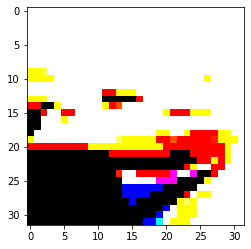

In [44]:
perturbations = adversarial_pattern(image, y_test[1]).numpy()
adversary_sample = image + perturbations*0.1
plt.imshow(adversary_sample.reshape((32, 32 , 3)))

In [45]:
make_predictions(cnn_model , labels , adversary_sample.reshape((1, 32, 32, 3)),image_index)

[3.8671706e-04 8.7402150e-02 9.1637231e-09 1.9577327e-07 5.3689395e-09
 2.4592144e-09 1.5515049e-08 1.8604345e-09 9.1204810e-01 1.6278903e-04]
prediction  ship  probability  0.9120481
true value  ship


In [37]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans
from cleverhans.tf2.attacks import fast_gradient_method

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)
